In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import neighbors 
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
data = np.array(mnist['data'])
target = np.array(mnist['target'])

In [4]:
np.random.seed(55645)
np.random.shuffle(data)
np.random.seed(55645)
np.random.shuffle(target)
x = data[0:5000]
y = target[0:5000]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [6]:
scoreList = []
for i in range(2,21):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    scoreA = knn.score(x_test,y_test)
    scoreList.append(scoreA)
    print("k = {} et score = {}".format(i,scoreA))

k = 2 et score = 0.916
k = 3 et score = 0.927
k = 4 et score = 0.921
k = 5 et score = 0.925
k = 6 et score = 0.929
k = 7 et score = 0.93
k = 8 et score = 0.921
k = 9 et score = 0.924
k = 10 et score = 0.921
k = 11 et score = 0.917
k = 12 et score = 0.918
k = 13 et score = 0.918
k = 14 et score = 0.92
k = 15 et score = 0.916
k = 16 et score = 0.918
k = 17 et score = 0.918
k = 18 et score = 0.914
k = 19 et score = 0.916
k = 20 et score = 0.913


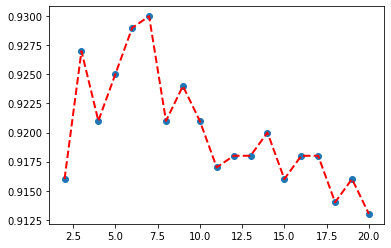

In [7]:
plt.scatter(range(2,21),scoreList)
plt.plot(range(2,21),scoreList,c="red",lw=2,ls="--")

In [8]:
model = neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
print("Le score est {}".format(model.score(x_test,y_test)))

Le score est 0.925


In [10]:
print("Erreur quadratique est {}".format(mean_squared_error(y_test,model.predict(x_test))))

Erreur quadratique est 1.381


In [11]:
x_testJust10 = x_test[0:10]
predictionsJust10 = model.predict(x_testJust10)

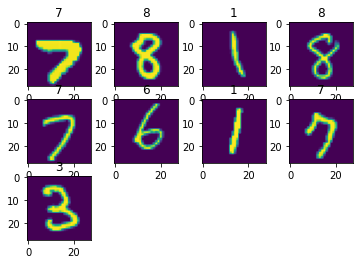

In [12]:
for i in range(1,10):
    plt.subplot(3,4,i)
    plt.imshow(x_testJust10[i-1].reshape(28,28))
    plt.title("{}".format(predictionsJust10[i-1]))

In [13]:
predictions = model.predict(x_test)

In [14]:
xplot = []
yplot = []
for i in range(len(predictions)):
    if(predictions[i] != y_test[i]):
        xplot.append(x_test[i])
        yplot.append(predictions[i])

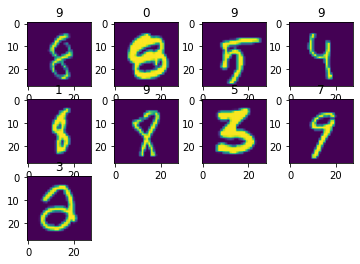

In [15]:
for i in range(1,10):
    plt.subplot(3,4,i)
    plt.imshow(xplot[i-1].reshape(28,28))
    plt.title("{}".format(yplot[i-1]))

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(2,21)}
grid=GridSearchCV(neighbors.KNeighborsClassifier(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])})

In [17]:
print(grid.best_estimator_)

KNeighborsClassifier(n_neighbors=4)


In [18]:
#Je testerai si cette estimation prends en considération la position des pixels
imageShuffle = np.array(x_test[0])
np.random.shuffle(imageShuffle)
valueImage = y_test[0]
predictedValue = model.predict(imageShuffle.reshape(1,784))

La vrai valeur de l'image est 7 et la fausse est ['1']


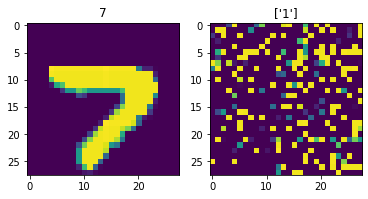

In [19]:
plt.subplot(1,2,1)
plt.imshow(x_test[0].reshape(28,28))
plt.title("{}".format(y_test[0]))
plt.subplot(1,2,2)
plt.title("{}".format(predictedValue))
plt.imshow(imageShuffle.reshape(28,28))
print("La vrai valeur de l'image est {} et la fausse est {}".format(y_test[0],predictedValue))